In [353]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from random import randint

In [2]:
#from matplotlib.colors import ListedColormap

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import cv2

In [5]:
class AdaLineGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0,scale=0.01, size= 1 + X.shape[1])

        self.cost_ = []
        
        for i in  range(self.n_iter ):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors) 
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            
            self.cost_.append(cost)
        
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] # w_[0] нейрон смещения
    def activation(self, X):
        return X
        #return 1.0 / (1.0 + np.exp(- X ))
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [168]:
# Учим просто понимать можно поставить на текущую позицию в линии или нельзя

X = np.array([
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [0,1,1],
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,1], 
    
     
    [0,0,-1],
    [0,-1,0],
    [0,-1,-1],
    [-1,0,0],
    [-1,0,-1],
    [-1,-1,0],
    [-1,-1,-1],
])

X = np.where(X==-1, 2, X)
X = np.where(X==0, -1, X)

y1 =  np.array([1,1,1,1, -1,-1,-1,-1,  1,1,1,-1,-1,-1,-1])

y2 = np.array([1,1, -1,-1, 1,1, -1,-1, 1, -1,-1, 1,1, -1,-1])

y3 = np.array([1, -1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, -1])



In [169]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X, y1, test_size=0.2, random_state = 1, stratify=y1
)


In [170]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y2, test_size=0.2, random_state = 1, stratify=y2
)


In [171]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X, y3, test_size=0.2, random_state = 1, stratify=y3
)


In [175]:
ada1 = AdaLineGD( eta=0.01, n_iter=30, random_state=1)
ada2 = AdaLineGD( eta=0.01, n_iter=30, random_state=1)
ada3 = AdaLineGD( eta=0.01, n_iter=30, random_state=1)

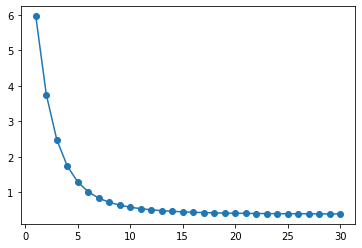

In [178]:
ada1.fit(X_train1, y_train1)
plt.plot(range(1 , len(ada1.cost_) + 1 ), ada1.cost_, marker='o')
plt.show()

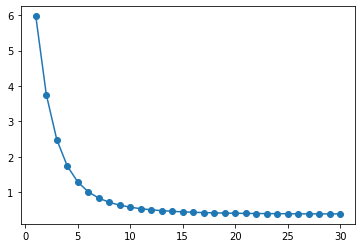

In [179]:
ada2.fit(X_train2, y_train2)
plt.plot(range(1 , len(ada2.cost_) + 1 ), ada2.cost_, marker='o')
plt.show()

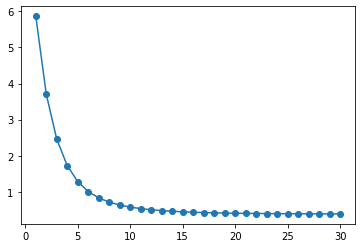

In [180]:
ada3.fit(X_train3, y_train3)
plt.plot(range(1 , len(ada3.cost_) + 1 ), ada3.cost_, marker='o')
plt.show()

In [181]:
ada1.predict([1,1,10])

array(-1)

In [167]:
ada2.predict([4,15,4])

array(-1)

In [76]:
ada3.predict([0,0,1])

array(-1)

# Обучаем наши игровые нейроны

## Нейрон 1 - ada_win

####  Всегда хочет победить
#### Ставит всё на удачу
#### Ему всегда везеь 
#### Любит талисманы

In [358]:
X_win = np.array([
   
    [0,0,0], # -  
    [0,0,1], # -
    [0,1,0], # - 
    [0,1,1], # +
    [1,0,0], # -
    [1,0,1], # +
    [1,1,0], # +
     
    [0,0,-1], # - 
    [0,-1,0], # - 
    [0,-1,-1], # - 
    [-1,0,0], # - 
    [-1,0,-1], # - 
    [-1,-1,0], # - 
    
    #[0,1,1], # +
    # [1,1,0], # +
  #  [0,1,1], # +
  #   [1,1,0], # +
])
X_win = np.where(X_win==-1, 10, X_win)
X_win = np.where(X_win==0, -1, X_win)

y_win = np.array([
                  -1, -1, -1,
                  1, 
                  -1,
                 1,1,
                 -1,-1,-1, -1,-1,-1,
    
              #      1,1,1,1
                 ])

X_win.shape[0] == y_win.shape[0]


True

In [345]:
X_train_win, X_test_win, y_train_win, y_test_win = train_test_split(
    X_win, y_win, test_size=0.2, random_state = 1, stratify=y_win
)
X_test_win

array([[ 1,  1, -1],
       [ 2, -1,  2],
       [-1,  1,  1],
       [-1,  2, -1]])

In [350]:
ada_win = AdaLineGD( eta=0.001, n_iter=500, random_state=1)

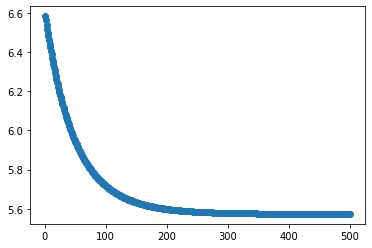

In [351]:
ada_win.fit(X_train_win, y_train_win)
plt.plot(range(1 , len(ada_win.cost_) + 1 ), ada_win.cost_, marker='o')
plt.show()

In [352]:
ada_win.predict([1,2,-1])

array(1)

<IPython.core.display.Javascript object>


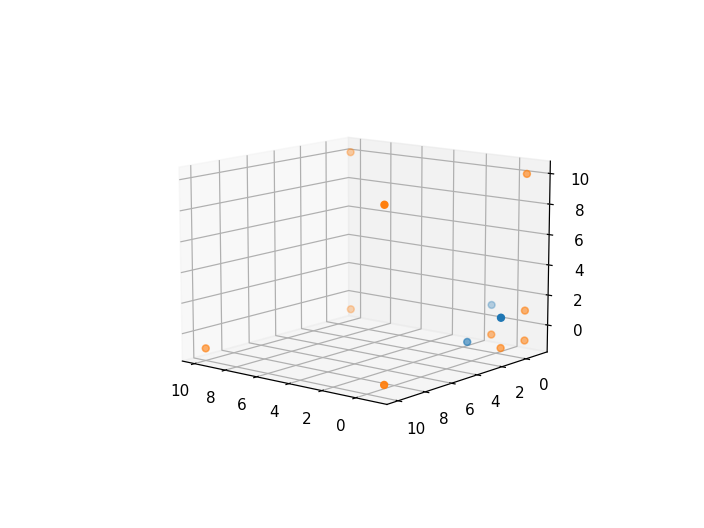

In [362]:



%matplotlib notebook
x1 = X_win[y_win == 1]
x2 = X_win[y_win == -1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1.T[0], x1.T[1],x1.T[2])
ax.scatter(x2.T[0], x2.T[1],x2.T[2])